<a href="https://colab.research.google.com/github/ignaciofestino/ENTREGA-PF-DSI/blob/main/PFDS_ParteIII__Festino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega Trabajo Final**
 **Análisis de Sentimiento en Reseñas de IMDB: Preprocesamiento NLP y Clasificación con Redes Neuronales**

DATA SCIENCE III: NLP & Deep Learning aplicado a Ciencia de Datos

IGNACIO FESTINO


---




# **Abstract**

El análisis de sentimiento en texto es una tarea fundamental en el procesamiento del lenguaje natural (NLP). En este trabajo, se utiliza el dataset IMDB Reviews, que contiene reseñas de películas etiquetadas como positivas o negativas. Primero, se realiza un preprocesamiento del texto aplicando técnicas como tokenización, remoción de stopwords y lematización. Luego, se extraen características mediante TF-IDF para representar los textos de manera numérica. Finalmente, se entrena una red neuronal profunda con al menos dos capas para clasificar las reseñas según su polaridad. Los resultados se comparan con un modelo base para evaluar mejoras en la clasificación.

# **Objetivos**

✅ Explorar y preprocesar el dataset **IMDB Reviews** aplicando técnicas de NLP.  

✅ Extraer características del texto mediante **TF-IDF** u otra técnica de vectorización.  

✅ Entrenar una **red neuronal** para clasificar reseñas en positivas y negativas.  

✅ Evaluar y comparar el desempeño del modelo con un enfoque más simple.  

✅ Plantear conclusiones y posibles mejoras.

### **Analisis exploratorio de datos (DEA)**

In [17]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("IMDB Dataset.csv")
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


<ipython-input-18-59e7f6cac4a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="viridis")


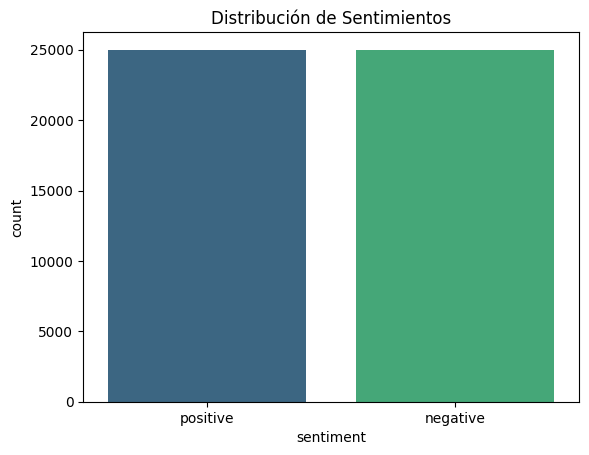

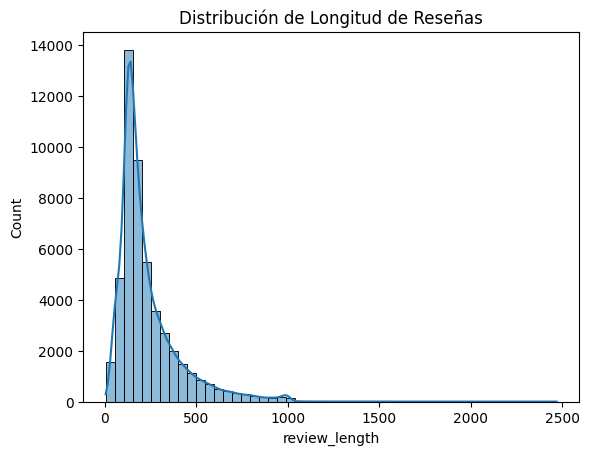

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de clases (positivo vs negativo)
sns.countplot(x="sentiment", data=df, palette="viridis")
plt.title("Distribución de Sentimientos")
plt.show()

# Distribución de la longitud de las reseñas
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribución de Longitud de Reseñas")
plt.show()


**Conclusiones del DEA**

1- Distribución Equilibrada de Sentimientos:

Tanto las reseñas positivas como las negativas cuentan con aproximadamente 25,000 ejemplos cada una.

Insight: Esto indica un dataset perfectamente balanceado, lo cual es ideal para evitar sesgos en el modelo de clasificación. El equilibrio asegura que el modelo no favorezca a ninguna clase.

2- Distribución asimétrica:

La mayoría de las reseñas tienen una longitud entre 50 y 200 palabras, formando un pico notable en esa región.

Las reseñas muy largas (>500 palabras) son poco frecuentes.

Interpretación: Esto refleja que los usuarios generalmente prefieren dejar reseñas concisas en lugar de elaboradas.

3- Reseñas atípicas (outliers):

Las pocas reseñas que superan las 1000 palabras son casos extremos y podrían requerir un manejo especial en el preprocesamiento.

Posible acción: Podrías considerar truncar o dividir estas reseñas largas para que no dominen las métricas o aumenten innecesariamente la complejidad del análisis.

### **Preprocesamiento de texto**

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Eliminación de stopwords y lematización
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenización
    tokens = [word for word in tokens if word.isalnum()]  # Remover caracteres no alfanuméricos
    tokens = [word for word in tokens if word not in stop_words]  # Remover stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lematización
    return tokens

# Aplicar preprocesamiento
df['processed_review'] = df['review'].apply(preprocess_text)
print("Ejemplo de preprocesamiento:")
print(df['processed_review'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Ejemplo de preprocesamiento:
0    [one, reviewer, mentioned, watching, 1, oz, ep...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, family, little, boy, jake, think, ...
4    [petter, mattei, love, time, money, visually, ...
Name: processed_review, dtype: object


### **Análisis avanzado: TF-IDF o análisis de sentimientos.**

**Analisis de sentimientos**



In [26]:
from textblob import TextBlob

# Función para calcular el sentimiento de cada reseña
def analyze_sentiment(text):
    sentiment = TextBlob(text).sentiment
    return sentiment.polarity  # Rango entre -1 (negativo) y 1 (positivo)

# Aplicar el análisis de sentimiento
df['sentiment_score'] = df['review'].apply(analyze_sentiment)

# Ejemplo de resultados
print("Primeras filas con puntaje de sentimiento:")
print(df[['review', 'sentiment_score']].head())


Primeras filas con puntaje de sentimiento:
                                              review  sentiment_score
0  One of the other reviewers has mentioned that ...         0.023433
1  A wonderful little production. <br /><br />The...         0.109722
2  I thought this was a wonderful way to spend ti...         0.354008
3  Basically there's a family where a little boy ...        -0.057813
4  Petter Mattei's "Love in the Time of Money" is...         0.217952


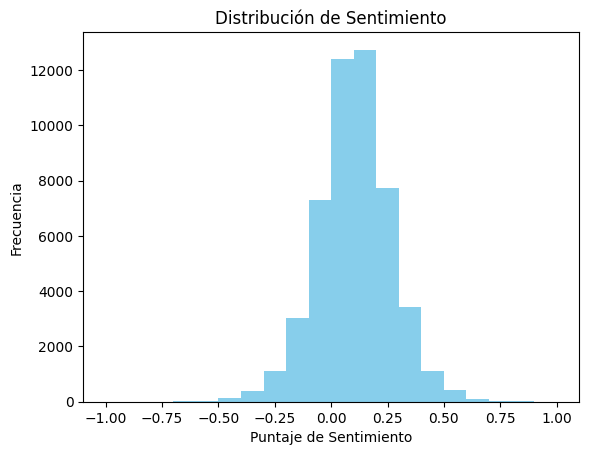

In [27]:
import matplotlib.pyplot as plt

plt.hist(df['sentiment_score'], bins=20, color='skyblue')
plt.title('Distribución de Sentimiento')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


**Conclusion**

- La mayoría de las reseñas tienen un puntaje de sentimiento cercano a 0.0, lo que indica un tono predominantemente neutral.

- Existe una simetría razonable entre las reseñas con sentimientos positivos (puntuaciones hacia 1.0) y negativos (puntuaciones hacia -1.0).

- Hay pocas reseñas con valores de sentimiento extremos (muy cerca de -1.0 o 1.0), lo que indica que las opiniones absolutamente entusiastas o críticas son menos comunes.

**TF-IDF**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # 5000 palabras más importantes
X = vectorizer.fit_transform(df['review'])
print("TF-IDF completo")


TF-IDF completo


In [22]:
# Obtener los nombres de las palabras seleccionadas por TF-IDF
feature_names = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un DataFrame para mejor visualización
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Mostrar las palabras más importantes (columna TF-IDF más alta)
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)
print("Palabras más importantes según TF-IDF:")
print(tfidf_sums.head(10))


Palabras más importantes según TF-IDF:
the     10471.585945
and      5308.367506
of       4731.324087
br       4728.668864
to       4420.714505
is       3779.974620
it       3670.141430
in       3225.962327
this     2984.970814
that     2714.605542
dtype: float64


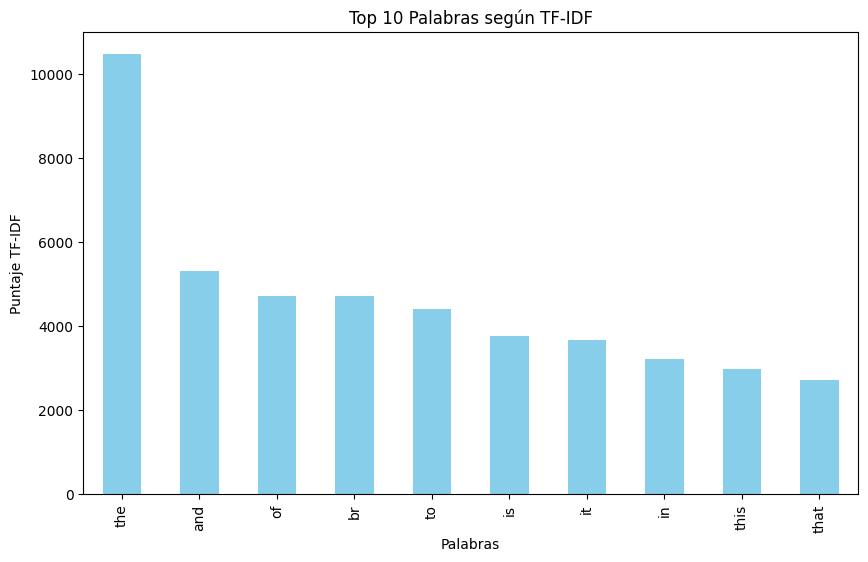

In [23]:
import matplotlib.pyplot as plt

# Graficar las 10 palabras con mayor TF-IDF
tfidf_sums.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Palabras según TF-IDF')
plt.xlabel('Palabras')
plt.ylabel('Puntaje TF-IDF')
plt.show()


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'].apply(lambda x: 1 if x == "positive" else 0), test_size=0.2)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.8942


**Conclusion**

La precisión obtenida sugiere que el modelo está aprovechando bien el dataset equilibrado, mostrando que no favorece excesivamente ninguna de las clases (positivo o negativo).

### **Red neuronal**

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'].apply(lambda x: 1 if x == "positive" else 0), test_size=0.2)

# Modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8451 - loss: 0.3715
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9157 - loss: 0.2101
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9377 - loss: 0.1625
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9753 - loss: 0.0762
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9946 - loss: 0.0184


In [24]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f"Pérdida (Loss): {loss:.4f}")
print(f"Precisión (Accuracy): {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8767 - loss: 0.5985
Pérdida (Loss): 0.5797
Precisión (Accuracy): 0.8820


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.8829 - val_loss: 0.7433
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 1.0000 - loss: 4.3497e-04 - val_accuracy: 0.8818 - val_loss: 0.8383
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 1.0000 - loss: 1.2577e-04 - val_accuracy: 0.8820 - val_loss: 0.9311
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 1.0000 - loss: 4.3378e-05 - val_accuracy: 0.8823 - val_loss: 1.0065
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 1.0000 - loss: 2.0163e-05 - val_accuracy: 0.8825 - val_loss: 1.0638


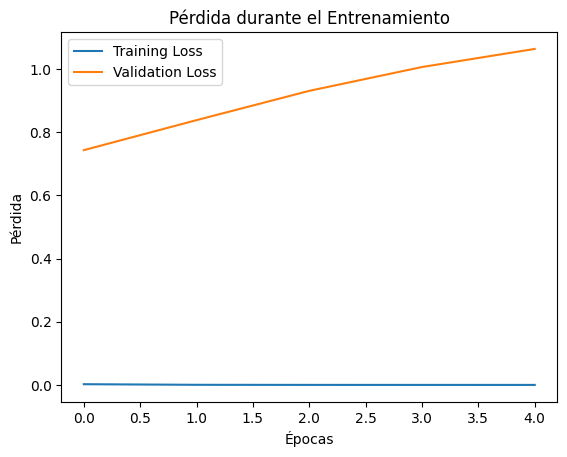

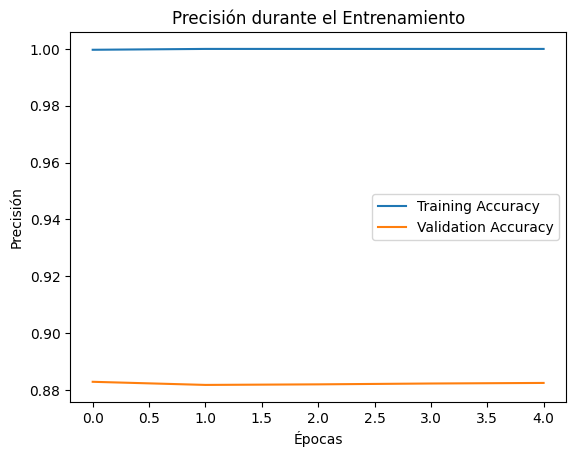

In [25]:
import matplotlib.pyplot as plt

# Historial del entrenamiento
history = model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, validation_data=(X_test.toarray(), y_test), verbose=1)

# Graficar pérdida (Loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar precisión (Accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entrenar regresión logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluación en conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Precisión del modelo sencillo (Regresión Logística):", logistic_accuracy)

Precisión del modelo sencillo (Regresión Logística): 0.8942


**Análisis Comparativo**

 *Precisión (Accuracy):*


*   Regresión Logística: 89.42%

*   Red Neuronal: 88.20%


Interpretación: Aunque la red neuronal es más compleja, el modelo lineal logra un mejor rendimiento.

*Costo Computacional:*

La regresión logística es significativamente más eficiente y rápida de entrenar. Su simplicidad y menor demanda de recursos la hacen una excelente opción para este tipo de tarea.

*Generalización:*

Aunque la red neuronal mostró un problema claro de sobreajuste (alcanzando una precisión perfecta en entrenamiento), la regresión logística parece generalizar mejor y mantener un rendimiento más estable entre los conjuntos de entrenamiento y prueba.

*Margen de Mejora de la Red Neuronal*:

Implementar estrategias como regularización (Dropout, Early Stopping) y explorar representaciones de texto más avanzadas podrían permitir a la red neuronal superar a la regresión logística en problemas similares.